In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

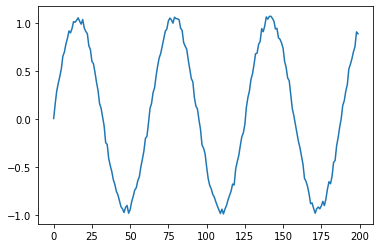

In [133]:
series = np.sin(0.1*np.arange(200))   + np.random.rand(200)*0.1 #+ np.sin(0.15*np.arange(1000))

plt.plot(series)
plt.show()

In [134]:
###build the data set
#let's see if we can use T past values to predict the next value

T=5
D=1
X=[]
Y=[]
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y= series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1) #Now the data should be NxTxD
Y = np.array(Y)
N=len(X)
print('X.shape',X.shape,'Y.shape,',Y.shape)

X.shape (195, 5, 1) Y.shape, (195,)


In [135]:
### try autoregressive RNN model
i = Input(shape=(T,1))
x = SimpleRNN(15, activation='relu')(i)
x = Dense(1)(x)

model = Model(i,x)

model.compile(
    loss='mse',
    optimizer=Adam(lr=0.001)
)

#Train RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:])
) 

Epoch 1/80
4/4 [==============================] - 0s 49ms/step - loss: 1.6680 - val_loss: 0.9896
Epoch 2/80
4/4 [==============================] - 0s 12ms/step - loss: 1.4727 - val_loss: 0.8892
Epoch 3/80
4/4 [==============================] - 0s 11ms/step - loss: 1.3072 - val_loss: 0.8036
Epoch 4/80
4/4 [==============================] - 0s 12ms/step - loss: 1.1686 - val_loss: 0.7317
Epoch 5/80
4/4 [==============================] - 0s 13ms/step - loss: 1.0465 - val_loss: 0.6758
Epoch 6/80
4/4 [==============================] - 0s 11ms/step - loss: 0.9562 - val_loss: 0.6309
Epoch 7/80
4/4 [==============================] - 0s 10ms/step - loss: 0.8843 - val_loss: 0.5918
Epoch 8/80
4/4 [==============================] - 0s 11ms/step - loss: 0.8235 - val_loss: 0.5572
Epoch 9/80
4/4 [==============================] - 0s 11ms/step - loss: 0.7713 - val_loss: 0.5269
Epoch 10/80
4/4 [==============================] - 0s 13ms/step - loss: 0.7232 - val_loss: 0.4987
Epoch 11/80
4/4 [============

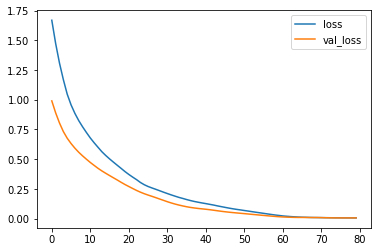

In [136]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions=[]

#first validation input

last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1,1))[0,0] # 1x1 array -> scalar

  #update the predictions list
  validation_predictions.append(p)

  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

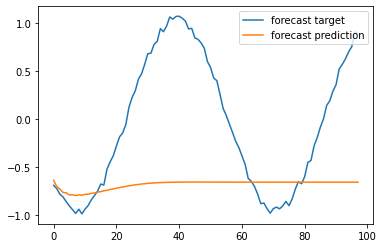

In [138]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [144]:
model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 5, 1)]            0         
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 15)                255       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 16        
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [152]:
model.layers[1].get_weights()

[array([[-3.5807961e-01,  1.8531114e-01, -3.0851579e-01, -5.7770389e-01,
          5.9082329e-01, -5.0514995e-04,  8.6778745e-02,  3.7540880e-01,
          5.2778101e-01,  4.3917108e-01,  3.7283996e-01, -6.0881341e-01,
         -7.1650660e-03,  3.8027219e-02,  9.0673283e-02]], dtype=float32),
 array([[-0.2496394 ,  0.45436317,  0.12985224,  0.215659  ,  0.08210693,
          0.01067027, -0.02564107,  0.7229135 ,  0.15883036, -0.04985275,
         -0.2103544 ,  0.1340877 ,  0.2060972 ,  0.33045116, -0.26795304],
        [-0.17209709,  0.32079646,  0.3622838 , -0.21284834,  0.3270144 ,
         -0.02062214,  0.51113   , -0.28124762, -0.23805952,  0.12299108,
          0.17419656, -0.11518729,  0.19394083, -0.0384137 ,  0.23281923],
        [-0.21845049, -0.2058961 ,  0.18739323, -0.00769029, -0.1468037 ,
         -0.30540127, -0.2155916 ,  0.10023322,  0.05220278,  0.4717233 ,
         -0.07221944, -0.48173377,  0.01112015, -0.19876757,  0.11717466],
        [-0.01184712, -0.05844704,  0

In [151]:
a,b,c = model.layers[1].get_weights()
print(a.shape,b.shape,c.shape)

(1, 15) (15, 15) (15,)


In [0]:
Wx, Wh, bh = model.layers[1].get_weights()
W0, bo = model.layers[2].get_weights()

In [139]:
np.random.rand(1,10,2)

array([[[0.67933409, 0.62223106],
        [0.5811111 , 0.72816736],
        [0.60659266, 0.23697036],
        [0.51421377, 0.48528232],
        [0.28499809, 0.08047128],
        [0.04404449, 0.22240287],
        [0.35988676, 0.89884029],
        [0.43586659, 0.4259035 ],
        [0.79654057, 0.29589569],
        [0.0218006 , 0.19162345]]])

In [140]:
np.random.rand(2,10,2)

array([[[0.5106376 , 0.0136296 ],
        [0.96242782, 0.92095263],
        [0.53458384, 0.9447252 ],
        [0.63226341, 0.19477683],
        [0.24468147, 0.48701194],
        [0.5835971 , 0.28746815],
        [0.35774856, 0.92343585],
        [0.25466587, 0.4601496 ],
        [0.37669594, 0.23908472],
        [0.95350089, 0.62186455]],

       [[0.32502698, 0.40219767],
        [0.96039648, 0.94796352],
        [0.84994556, 0.74634421],
        [0.79818663, 0.54322054],
        [0.57261542, 0.36886957],
        [0.65314877, 0.2838379 ],
        [0.07799142, 0.00168561],
        [0.58250411, 0.69316421],
        [0.5062998 , 0.87103393],
        [0.91349167, 0.11893065]]])